In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../ArcPL_Dec2022.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_1256\2281926665.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## What are different filters doing

In [4]:
print('initial number of experiments')
sum(Press_new)

initial number of experiments


505

In [5]:
print('number thrown out for Kd')
print(sum(Press_new&~(eq_tests['Delta_Kd_Put2008']<0.08)))

number thrown out for Kd
106


In [6]:
print('number thrown out for EnFs')
print(sum(Press_new&~(eq_tests['Delta_EnFs_Mollo13']<0.05)))

number thrown out for EnFs
74


In [7]:
print('number thrown out for cation sums')
print(sum(Press_new&~(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))))



number thrown out for cation sums
20


In [8]:
print('number thrown out based on number of analyses')
print(sum(Press_new&~(cpx_Glass['N_meas_Cpx']>=5)))

number thrown out based on number of analyses
160


In [9]:
print('Number thrown out based on being dry, or no reported water contents')
print(sum(Press_new&~ (cpx_Glass['H2O_Liq']>0)))
   

Number thrown out based on being dry, or no reported water contents
45


In [10]:
print('remaining after filters')
len(Cpx_Mask)

remaining after filters


194

## Find ones in Jorgenson dataset - so aren't testing on ones that were used in calibration

In [12]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)

cpx_Glass_Mask_Jorg['Citation_x'].unique()

array(['Hamada2008_notinLEPR', 'Firth2019_notinLEPR',
       'Erdmann2016_notinLEPR', 'Parmon2011_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Cadoux2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Erdman_Koepke2016_notinLEPR', 'Waters2020_notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR'], dtype=object)

## Calculating Cpx components

In [14]:
cpx_comps=pt.calculate_clinopyroxene_liquid_components(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Calculating P and T

In [18]:
# Using the reduced dataset for Jorg
CalcJorg=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_Mask_Jorg, liq_comps=Liq_Mask_Jorg,
                                         equationP="P_Jorgenson2022_Cpx_Liq",
                                         equationT="T_Jorgenson2022_Cpx_Liq")


Calc=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask)
Calc.head()

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitation

Youve selected a T-independent function
Youve selected a T-independent function
We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286837,1383.754291,3.468250,1403.936002,2.853178,1381.515947,5.341567,1394.459212,3.923651,1387.054407,7.815784,1468.994038,9.510699,1504.676468,6.604441,7.143213,5.626683,1422.907714,3.542299,1463.188804,5.335914,1384.515455,4.684525,1381.801741,1454.834646,3.915262
1,3.086043,1401.974862,3.279286,1424.007138,2.239377,1397.496012,4.976932,1412.082043,1.480853,1393.507665,5.215677,1472.135541,5.616012,1480.563638,4.059819,4.371876,2.667050,1418.480225,4.243808,1470.805613,5.833034,1418.919091,5.266254,1425.110199,1454.371307,3.660578
2,4.021391,1413.719423,4.126892,1425.347370,3.353092,1410.122303,6.452332,1426.960191,4.825765,1418.073376,7.691297,1478.400357,9.027457,1506.530048,6.645875,7.059556,5.950759,1441.757448,4.503805,1474.010415,5.847409,1416.157273,5.255478,1408.647512,1465.100543,4.662398
3,5.858987,1424.380615,6.045046,1443.815202,4.251029,1415.626478,7.066578,1431.026566,4.820364,1418.713752,7.756938,1480.536365,8.628233,1498.879428,7.000209,7.381634,5.988356,1443.303063,5.661413,1477.639039,6.970080,1428.813636,6.564259,1425.065423,1472.635221,5.780369
4,6.662847,1427.815745,6.879102,1448.566051,5.267790,1420.177902,8.172520,1436.174201,6.463080,1426.716998,9.278533,1485.989702,9.948963,1500.104010,8.537333,8.912891,7.967743,1458.394122,6.495474,1482.115899,7.550340,1426.617273,6.653483,1428.567910,1478.291974,6.895731


## Calculating statistics 

In [20]:
Temp_Stats_PN17_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq33)']) 
Temp_Stats_30_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq30, T_Put2008_eq33)']) 
Temp_Stats_31_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)']) 
Temp_Stats_32c_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq32c, T_Put2008_eq33)']) 
Temp_Stats_P2003=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P2003 P&T)']) 
Temp_Stats_Pet=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (Petrelli, 2020)']) 
Temp_Stats_Jor=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcJorg.T_K_calc)
Temp_Stats_32c_2003=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq32c, T_Put2003)']) 

Temp_Stats_P1996_P1_T2=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)']) 
Temp_Stats_34_PN17=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)']) 

## 6 part figure showing different thermometers

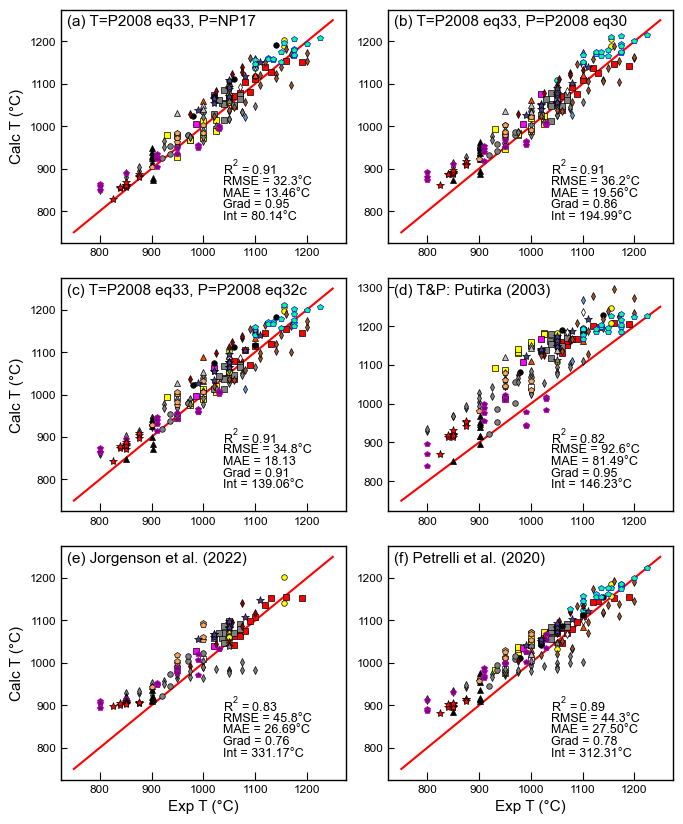

In [25]:
fig, ((ax0, ax1), (ax3, ax4), (ax2, ax5)) = plt.subplots(3,2, figsize = (7.9,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    
## Neave and putirka, eq 33
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Neave17, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq30, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_T_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             CalcJorg['T_K_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq32c, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        
        # Putirka 2003 expressions
    ax4.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P2003 P&T)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
# Petrelli et al. (2020)
    ax5.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (Petrelli, 2020)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) T=P2008 eq33, P=NP17", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("(b) T=P2008 eq33, P=P2008 eq30", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(e) Jorgenson et al. (2022)", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(c) T=P2008 eq33, P=P2008 eq32c", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("(d) T&P: Putirka (2003)", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax5.annotate("(f) Petrelli et al. (2020)", 
             xy=(0.02, 0.93), xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Temp_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax0.annotate("RMSE = "+str(Temp_Stats_PN17_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax0.annotate("MAE = "+str(Temp_Stats_PN17_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax0.annotate("Grad = "+str(Temp_Stats_PN17_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax0.annotate("Int = "+str(Temp_Stats_PN17_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax1.annotate("R$^{2}$ = "+str(Temp_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE = "+str(Temp_Stats_30_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax1.annotate("MAE = "+str(Temp_Stats_30_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("Grad = "+str(Temp_Stats_30_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Int = "+str(Temp_Stats_30_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)





ax2.annotate("R$^{2}$ = "+str(Temp_Stats_Jor['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE = "+str(Temp_Stats_Jor['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax2.annotate("MAE = "+str(Temp_Stats_Jor['Mean Error']) +"°C",
                           xy=(0.57, 0.20), xycoords="axes fraction", fontsize=9)
ax2.annotate("Grad = "+str(Temp_Stats_Jor['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Int = "+str(Temp_Stats_Jor['Int']) +"°C",
                           xy=(0.57, 0.10), xycoords="axes fraction", fontsize=9)



ax3.annotate("R$^{2}$ = "+str(Temp_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE = "+str(Temp_Stats_32c_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax3.annotate("MAE = "+str(Temp_Stats_32c_Teq33['Mean Error']),
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax3.annotate("Grad = "+str(Temp_Stats_32c_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Int = "+str(Temp_Stats_32c_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)




ax4.annotate("R$^{2}$ = "+str(Temp_Stats_P2003['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax4.annotate("RMSE = "+str(Temp_Stats_P2003['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax4.annotate("MAE = "+str(Temp_Stats_P2003['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax4.annotate("Grad = "+str(Temp_Stats_P2003['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax4.annotate("Int = "+str(Temp_Stats_P2003['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax5.annotate("R$^{2}$ = "+str(Temp_Stats_Pet['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE = "+str(Temp_Stats_Pet['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax5.annotate("MAE = "+str(Temp_Stats_Pet['Mean Error']) +"°C",
                           xy=(0.57, 0.20), xycoords="axes fraction", fontsize=9)
ax5.annotate("Grad = "+str(Temp_Stats_Pet['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Int = "+str(Temp_Stats_Pet['Int']) +"°C",
                           xy=(0.57, 0.10), xycoords="axes fraction", fontsize=9)


plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax3.set_ylabel('Calc T (°C)')
ax2.set_xlabel('Exp T (°C)')
ax5.set_xlabel('Exp T (°C)')
fig.savefig('Cpx_Liq_Temp_Comparison_lABELLED.png', dpi=300)

## Lets assess how sensitive Cpx-liq thermometers actually are to Cpx

In [19]:
## Lets match up every Cpx and every liquid, and then see how much temp changes as you change the Cpx
Calc_Cpx_NP_eq33_match=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask,
                                         P=np.nanmean(cpx_Glass_Mask['P_kbar_x']),
                                         equationT="T_Put2008_eq33", 
                                        return_all_pairs=True)

## Lets match up every Cpx and every liquid, and then see how much temp changes as you change the Cpx
Calc_Cpx_NP_eq33=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask,
                                         P=np.nanmean(cpx_Glass_Mask['P_kbar_x']),
                                         equationT="T_Put2008_eq33", 
                                        )

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=194 Cpx & N=194 Liqs, which is a total of N=37636 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=37636 Cpx-Liq matches using the specified filter. N=194 Cpx out of the N=194 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Second column for Fig 8

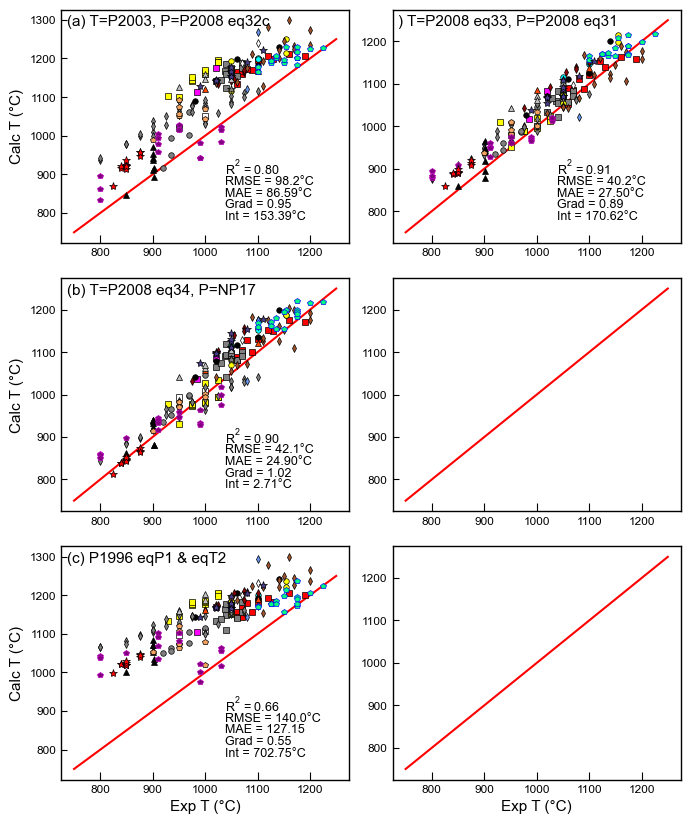

In [28]:

fig, ((ax0, ax1), (ax2, ax4), (ax3, ax5)) = plt.subplots(3,2, figsize = (8,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
## Neave and putirka, eq 33
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq32c, T_Put2003)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) T=P2003, P=P2008 eq32c", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate(") T=P2008 eq33, P=P2008 eq31", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(b) T=P2008 eq34, P=NP17", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(c) P1996 eqP1 & eqT2", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Temp_Stats_32c_2003['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax0.annotate("RMSE = "+str(Temp_Stats_32c_2003['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax0.annotate("MAE = "+str(Temp_Stats_32c_2003['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax0.annotate("Grad = "+str(Temp_Stats_32c_2003['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax0.annotate("Int = "+str(Temp_Stats_32c_2003['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax1.annotate("R$^{2}$ = "+str(Temp_Stats_31_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE = "+str(Temp_Stats_31_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax1.annotate("MAE = "+str(Temp_Stats_31_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("Grad = "+str(Temp_Stats_31_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Int = "+str(Temp_Stats_31_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)




ax2.annotate("R$^{2}$ = "+str(Temp_Stats_34_PN17['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE = "+str(Temp_Stats_34_PN17['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax2.annotate("MAE = "+str(Temp_Stats_34_PN17['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("Grad = "+str(Temp_Stats_34_PN17['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Int = "+str(Temp_Stats_34_PN17['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)

ax3.annotate("R$^{2}$ = "+str(Temp_Stats_P1996_P1_T2['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE = "+str(Temp_Stats_P1996_P1_T2['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax3.annotate("MAE = "+str(Temp_Stats_P1996_P1_T2['Mean Error']),
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax3.annotate("Grad = "+str(Temp_Stats_P1996_P1_T2['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Int = "+str(Temp_Stats_P1996_P1_T2['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)





plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax3.set_ylabel('Calc T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax5.set_xlabel('Exp T (°C)')
fig.savefig('Cpx_Liq_Temp_Comparison_part2.png', dpi=300)

### Supporting fig showing mostly a liq thermometer

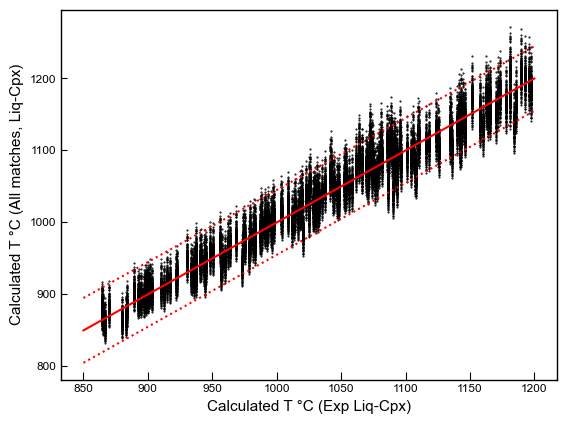

In [17]:
All_match=Calc_Cpx_NP_eq33_match['All_PTs']

for liq in All_match['Sample_ID_Liq'].unique():
    y=All_match['T_K_calc'].loc[All_match['Sample_ID_Liq']==liq]-273.15
    EnFs=All_match['EnFs'].loc[All_match['Sample_ID_Liq']==liq]
    lnKd=All_match['lnK_Jd_DiHd_liq_2003'].loc[All_match['Sample_ID_Liq']==liq]
    x=y*0+Calc_Cpx_NP_eq33.loc[Liq_Mask['Sample_ID_Liq']==liq].iloc[0]-273.15
    plt.plot(x, y, '.k', ms=1)
    
plt.plot([850, 1200], [850, 1200], '-r')
plt.plot([850, 1200], [850+45, 1200+45], ':r')
plt.plot([850, 1200], [850-45, 1200-45], ':r')

plt.xlabel('Calculated T °C (Exp Liq-Cpx)')
plt.ylabel('Calculated T °C (All matches, Liq-Cpx)')
plt.savefig('Supplemnet_DoesCpxMatter.png', dpi=200)

## Supplementary Fig - discrepency with H2O

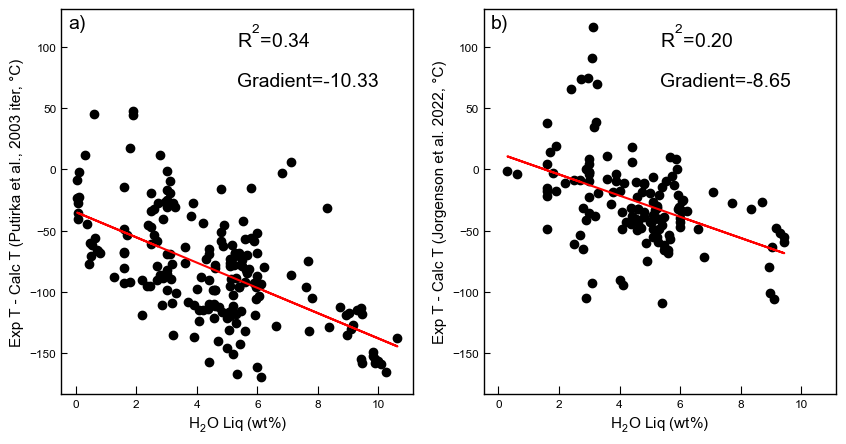

In [26]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True)

stats_Jorg=pt.calculate_R2(Liq_Mask_Jorg['H2O_Liq'],
    (x_T_Mask_Jorg)-
             (CalcJorg['T_K_calc']))

ax1.plot(Liq_Mask_Jorg['H2O_Liq'],
    (x_T_Mask_Jorg)-
             (CalcJorg['T_K_calc']),
            'ok')
ax1.plot(stats_Jorg['x_pred'], stats_Jorg['y_pred'], '-r')
ax1.set_xlabel('H$_2$O Liq (wt%)')
ax1.set_ylabel('Exp T - Calc T (Jorgenson et al. 2022, °C)')
ax1.annotate('R$^{2}$=' + str(stats_Jorg['R2']), xy=(0.5, 0.90),
                xycoords="axes fraction", fontsize=14)
ax1.annotate('Gradient=' + str(np.round(stats_Jorg['Grad'][0], 2)), xy=(0.5, 0.80),
                xycoords="axes fraction", fontsize=14)


stats_2003=pt.calculate_R2(Liq_Mask['H2O_Liq'],
    (x_T_Mask)-
             (Calc['T_K: (P2003 P&T)']))

ax2.plot(Liq_Mask['H2O_Liq'],
    (x_T_Mask)-
             (Calc['T_K: (P2003 P&T)']),
            'ok')
ax2.plot(stats_2003['x_pred'], stats_2003['y_pred'], '-r')
ax2.set_xlabel('H$_2$O Liq (wt%)')
ax2.set_ylabel('Exp T - Calc T (Putirka et al., 2003 iter, °C)')
ax2.annotate('R$^{2}$=' + str(stats_2003['R2']), xy=(0.5, 0.90),
                xycoords="axes fraction", fontsize=14)

ax2.annotate('Gradient=' + str(np.round(stats_2003['Grad'][0], 2)), xy=(0.5, 0.80),
                xycoords="axes fraction", fontsize=14)
ax2.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

ax1.yaxis.set_tick_params(which='both', labelbottom=True)
plt.savefig('P2003_J2022_H2O_Corr.png', dpi=300)